# ispace 週足

In [1]:
import sys
import os
import re

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

try:
    __file__
    sys.path.append(os.path.join(os.path.dirname(__file__), '..'))
except NameError:
    from pathlib import Path
    Path().resolve()
    sys.path.append(os.path.join(Path().resolve(), '..'))

from funcs.technical import psar

In [2]:
pattern = re.compile(r'(.+)\.T')

symbol = '9348.T'
ticker = yf.Ticker(symbol)

df = ticker.history(period='5y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-04-10 00:00:00+09:00,1000.0,1501.0,950.0,1501.0,29053600,0.0,0.0
2023-04-17 00:00:00+09:00,1901.0,2373.0,1800.0,1804.0,74281100,0.0,0.0
2023-04-24 00:00:00+09:00,1964.0,2170.0,1001.0,1017.0,47943300,0.0,0.0
2023-05-01 00:00:00+09:00,1025.0,1193.0,1005.0,1010.0,16424300,0.0,0.0
2023-05-08 00:00:00+09:00,1022.0,1027.0,793.0,856.0,12355400,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-03 00:00:00+09:00,668.0,691.0,606.0,620.0,15034800,0.0,0.0
2025-02-10 00:00:00+09:00,627.0,660.0,615.0,631.0,6913000,0.0,0.0
2025-02-17 00:00:00+09:00,650.0,658.0,613.0,623.0,5376000,0.0,0.0


## 日足チャートとパラボリック SAR

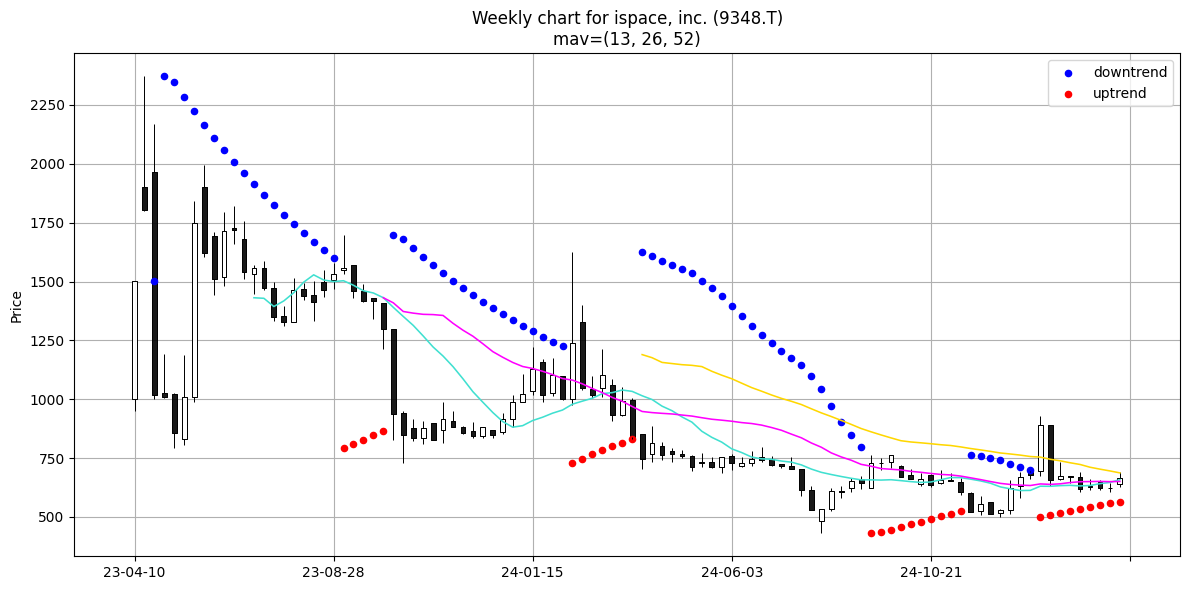

In [3]:
dict_psar = psar(df)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

apds  = [
    mpf.make_addplot(
        dict_psar['bear'],
        type='scatter',
        marker='o',
        markersize=20,
        color='blue',
        label='downtrend',
        ax=ax
    ),
    mpf.make_addplot(
        dict_psar['bull'],
        type='scatter',
        marker='o',
        markersize=20,
        color='red',
        label='uptrend',
        ax=ax
    ),
] 

mpf.plot(
    df,
    type='candle',
    style='default',
    mav=(13, 26, 52),
    volume=False,
    datetime_format='%y-%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax,
)

try:
    ax.set_title('Weekly chart for %s (%s)\nmav=(13, 26, 52)' % (ticker.info['longName'], symbol))
except KeyError:
    ax.set_title('Weekly chart for %s\nmav=(13, 26, 52)' % symbol)

ax.grid()
ax.legend(loc='best')

plt.tight_layout()

m = pattern.match(symbol)
if m:
    plt.savefig('weekly_chart_%s.png' % m.group(1))
else:
    plt.savefig('weekly_chart_%s.png' % symbol)

plt.show()

In [4]:
df.tail(2)['Close']

Date
2025-02-03 00:00:00+09:00    620.0
2025-02-10 00:00:00+09:00    640.0
Name: Close, dtype: float64

In [5]:
df.tail(2)['Close'].diff()

Date
2025-01-13 00:00:00+09:00     NaN
2025-01-20 00:00:00+09:00    39.0
Name: Close, dtype: float64

In [6]:
df['Close'].rolling(5).mean().tail(2)

Date
2025-01-13 00:00:00+09:00    704.0
2025-01-20 00:00:00+09:00    718.2
Name: Close, dtype: float64

In [7]:
df['Close'].rolling(25).mean().tail(2)

Date
2025-01-13 00:00:00+09:00    639.28
2025-01-20 00:00:00+09:00    645.88
Name: Close, dtype: float64

In [8]:
df['Close'].rolling(75).mean().tail(2)

Date
2025-01-13 00:00:00+09:00    852.066667
2025-01-20 00:00:00+09:00    842.480000
Name: Close, dtype: float64